# Homework Assignment 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1

Load the `'parks.csv'` data set and obtain the `value_counts()` for each state. Use the Pandas `plot()` function to create a `'bar'` chart with the `value_counts()`. Which state has the highest number of National Parks?

California                   9
Alaska                       8
Utah                         5
Colorado                     4
Florida                      3
Arizona                      3
Washington                   3
South Dakota                 2
Texas                        2
Hawaii                       2
New Mexico                   2
Maine                        1
Wyoming                      1
U.S. Virgin Islands          1
Michigan                     1
Montana                      1
Wyoming, Montana, Idaho      1
Ohio                         1
Virginia                     1
West Virginia                1
American Samoa               1
Kentucky                     1
Oregon                       1
Nevada                       1
Missouri                     1
Indiana                      1
Minnesota                    1
North Carolina, Tennessee    1
North Dakota                 1
Arkansas                     1
South Carolina               1
Name: location, dtype: int64
The locati

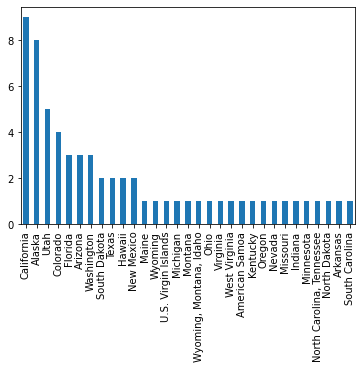

In [17]:
parks = pd.read_csv('parks.csv')
count_of_state = parks['location'].value_counts()
print(count_of_state)
count_of_state.plot(kind='bar')
#Which state has the highest number of National Parks?
highest = parks.groupby('location').count()
Number = max(highest["name"])
print("The location with highest number of parks is:", highest[highest.name == Number].name)

### Question 2

Group the `parks` data by `location` to find the `mean` number of `visitors_2019` for each state, then `plot()` these results using a `'bar'` chart again. Does this graph look the same or different from the graph in Question 1? (**Note:** Remember to pass `sort_values(ascending=False)` after your `groupby` aggregation to plot the values in descending order from most-visited states to least-visited!)

The below graph looks different from the graph plotted in question 1


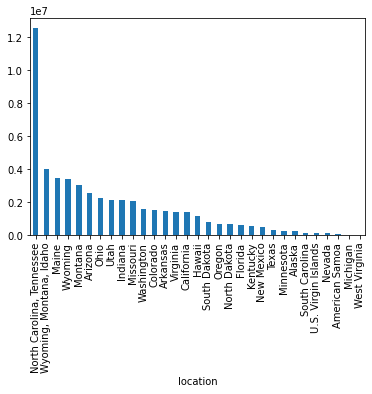

In [20]:
mean_visitors19 = parks['visitors_2019'].groupby(parks['location']).mean().sort_values(ascending=False)
mean_visitors19.plot(kind='bar')
print("The below graph looks different from the graph plotted in question 1")

### Question 3

Are older parks more popular than newer parks? To find out, first create a new variable for the `'year'` of establishment by passing the `'date_estb'` column in the function `pd.DatetimeIndex().year` (we will cover this in more depth in Class 5.) To account for multiple parks being opened in the same year, create a new DataFrame grouping the `parks.csv` data by `'year'` and summing the `'visitors_2019'` for each year and `reset_index()`. Then create a line plot with `'year'` on the x-axis and `'visitors_2019'` on the y-axis using this grouped DataFrame.

<AxesSubplot:xlabel='year', ylabel='visitors_2019'>

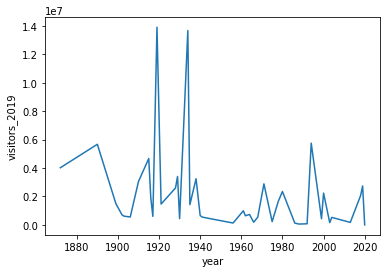

In [21]:
parks['year']= pd.DatetimeIndex(parks['date_estb']).year
grouped_df = parks.groupby('year')['visitors_2019'].sum().reset_index()
sns.lineplot(x='year',y='visitors_2019',data=grouped_df)

In [22]:
#Are older parks more popular than newer parks?
print(" Yes, From the above graphs, we can see that visitors are more for parks established between 1920-1940 than the newer parks!")

 Yes, From the above graphs, we can see that visitors are more for parks established between 1920-1940 than the newer parks!


### Question 4

Use Seaborn's `boxplot` function to compare the number of visitors to the national parks in California, Alaska, and Utah. Though these states have the largest numbers of national parks, do they see the same number of visitors? (**Note:** You will have to pass a subset of the DataFrame to the `data` argument to select only these three states. Recall that `.isin()` can take a list of strings when creating a Boolean mask for your data.)

No, The number of visitors to parks in these three states are different as we can see in the below graph


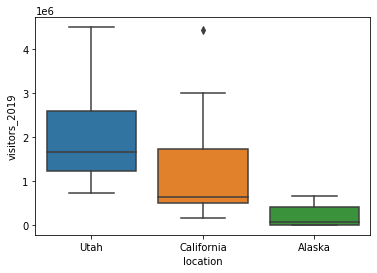

In [24]:
sub_df = parks[parks['location'].isin(['California','Alaska','Utah'])]
sns.boxplot(x='location',y='visitors_2019',data=sub_df)
#Though these states have the largest numbers of national parks, do they see the same number of visitors? 
print("No, The number of visitors to parks in these three states are different as we can see in the below graph")

### Question 5

Do people flock to larger parks? Plot a scatterplot of `area_2019` by `visitors_2019` using Seaborn's `regplot` function.

                  area_2019  visitors_2019          year
area_2019      2.664674e+12  -3.245326e+11  2.247120e+06
visitors_2019 -3.245326e+11   3.962197e+12 -2.663293e+07
year           2.247120e+06  -2.663293e+07  1.424046e+03

 No, From the scatter plot below, we can see more people going to smaller parks


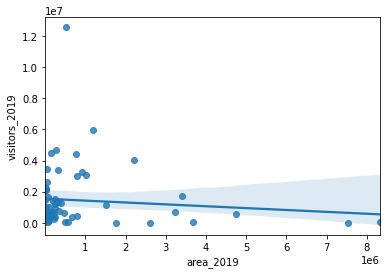

In [28]:
sns.regplot(x = 'area_2019',y = 'visitors_2019',data=parks)
print(parks.cov())

#Do people flock to larger parks? 
print("\n No, From the scatter plot below, we can see more people going to smaller parks")

### Question 6

Load the data `'nyc_buildings.csv'` and create a scatterplot of `height` and `floors`. Does the relationship between these two variables appear stronger or weaker than the relationship seen in Question 5?

               rank        height       floors         year
rank    1764.166667  -6718.020833  -345.062500  -249.298611
height -6718.020833  38953.043295  1811.255364  1271.743774
floors  -345.062500   1811.255364   147.879598    79.906370
year    -249.298611   1271.743774    79.906370   855.078544

 Yes, The relationship between the two variables appears more stronger for the variables plotted in question 6 than the variable plotted in question 5, as it has a very less covariance


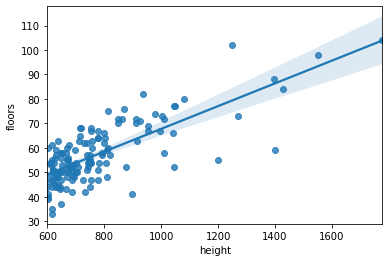

In [32]:
nyc_build = pd.read_csv('nyc_buildings.csv')
sns.regplot(x = 'height',y = 'floors',data=nyc_build)
print(nyc_build.cov())

# Does the relationship between these two variables appear stronger or weaker than the relationship seen in Question 5?
print("\n Yes, The relationship between the two variables appears more stronger for the variables plotted in question 6 than the variable plotted in question 5, as it has a very less covariance")

### Question 7

Group the `nyc_buildings` data by `year` and `sum` the total `height` for all buildings. Plot the resulting DataFrame as a line plot. Are the tallest buildings in New York relatively old or relatively young?

 From the below graph, it is evident that the tallest buildings in New York are relatively young.


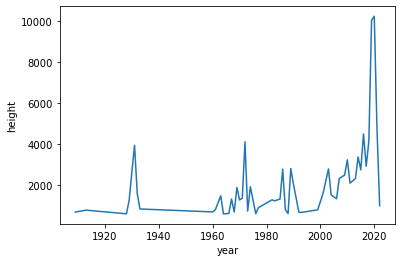

In [35]:
nyc_build_grp = nyc.groupby('year')['height'].sum().reset_index()
sns.lineplot(x='year',y='height',data=nyc_build_grp)

#Are the tallest buildings in New York relatively old or relatively young?
print(" From the below graph, it is evident that the tallest buildings in New York are relatively young.")

### Question 8

Are there streets in New York where tall buildings are especially concentrated? Group the data by `street` and `sum` the `height` of the buildings. Reset the index and sort the values from tallest to smallest. Create a bar plot of the top 10 streets with the tallest total heights. Is anything surprising? (**Note:** To view the x-axis labels more clearly, first declare your subplots with `f, ax = plt.subplots()` before creating your barplot. In the barplot options, set `ax=ax`. Then you can use `ax.set_xticklabels` and pass the list of top ten street names as the labels while explicitly declaring the degrees of rotation you would like to see.)

From the below graph, we can see that the streets - Park Avenue, Broadway, Sixth Avenue and West 57th Street are especially concentrated compared to others.


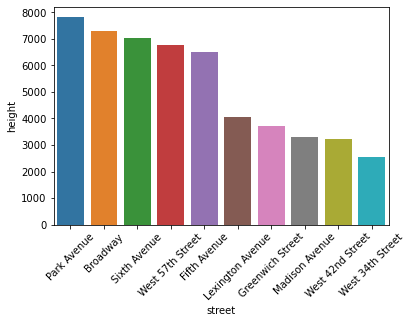

In [37]:
nyc_build_grp = nyc.groupby('street')['height'].sum().reset_index().sort_values(by='height',ascending=False)
f,ax = plt.subplots()
sns.barplot(x='street',y='height', data=nyc_build_grp[:10],ax=ax)
ax.set_xticklabels(nyc_build_grp['street'][:10],rotation=45)

#Are there streets in New York where tall buildings are especially concentrated?  Is anything surprising?
print("From the below graph, we can see that the streets - Park Avenue, Broadway, Sixth Avenue and West 57th Street are especially concentrated compared to others.")

### Question 9

Look at the distribution of `floors` in the `nyc_buildings` data using Seaborn's `distplot` function. Use 30 bins. Then `print` the `mean` number of `floors` in the data set -- does this agree with what you would have expected from looking at the graph?

Mean number of Floors: 57.15172413793103

Yes, from the below plot, we can see that the mean would be somewhere near 60.


C:\Users\Madhummitha Ravi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


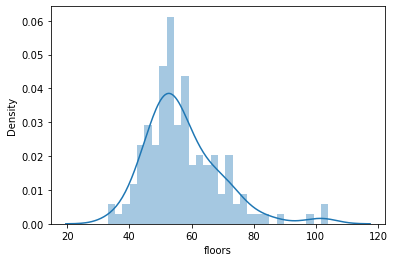

In [41]:
sns.distplot(nyc['floors'],bins=30)
print('Mean number of Floors:', nyc['floors'].mean())

#Does this agree with what you would have expected from looking at the graph?
print("\nYes, from the below plot, we can see that the mean would be somewhere near 60.")

### Question 10

Are there height differences between even-numbered floors and odd-numbered floors in New York? Recall that we can use `np.where()` to create a new variable, and that the modulus operator `%` will return the remainder. Create a binary variable called `'even'` where the field is `True` for an even number of floors and `False` for odd. Using Seaborn's `catplot` function, set `col='even'` and `kind='box'` to compare the two different `y='height'`. What do you observe?

From the below depicted distribution, we can see that some even floors are taller having range between 1400-1800.


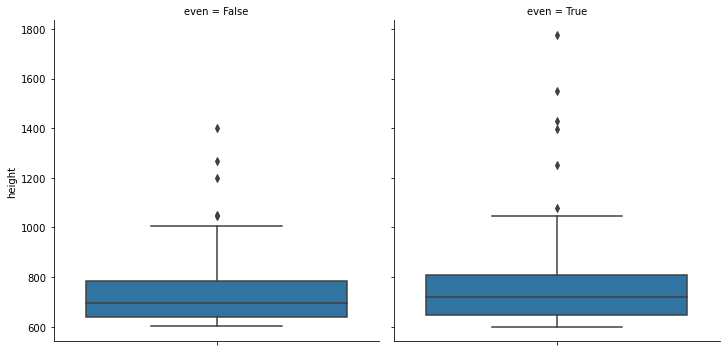

In [42]:
nyc['even'] = np.where(nyc['floors']%2 == 0, True, False)
sns.catplot(y='height', data=nyc, col='even', kind='box')

#Are there height differences between even-numbered floors and odd-numbered floors in New York?
print("From the below depicted distribution, we can see that some even floors are taller having range between 1400-1800.")